## TASK 4 - Scene Recognition using Convolutional Neural Networks

Group Number: Group_9-11_11


In [6]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [7]:
datamodule = my_datamodule.DataModule(img_size=64, batch_size=64,num_workers=1,preload=False,augmented=False)

### 2. Simple Scene CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [8]:
simple_model = my_model.MaskClassifier("simple_model", 64, 0)

In [9]:
summary(simple_model, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           --                        --
├─Sequential: 1-1                        [32, 32, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 32, 62, 62]          896
│    └─ReLU: 2-2                         [32, 32, 62, 62]          --
│    └─Identity: 2-3                     [32, 32, 62, 62]          --
│    └─MaxPool2d: 2-4                    [32, 32, 31, 31]          --
│    └─Dropout: 2-5                      [32, 32, 31, 31]          --
│    └─Conv2d: 2-6                       [32, 32, 29, 29]          9,248
│    └─ReLU: 2-7                         [32, 32, 29, 29]          --
│    └─Identity: 2-8                     [32, 32, 29, 29]          --
│    └─MaxPool2d: 2-9                    [32, 32, 14, 14]          --
│    └─Dropout: 2-10                     [32, 32, 14, 14]          --
├─Sequential: 1-2                        [32, 1]                   --
│    └─Line

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

The OutputShape represents the dimensions of each layer in the CNN after the corresponding step was applied. [# of Batches, # of Channels, Height, Width]
Param represenets the number of weights that are changed/communicated through backpropagation.
We reduce the number of parameters with every MaxPool step. This prevents overfitting by not providing every layer with total information and it actually having to classify well. 

The last layer has length 1 since we want a binary classification of "is wearing a mask" or "is not wearing a mask". The last layer is a value between 0 and 1 and tells the confidence of our networks prediction if the image is of a person wearing a mask or not.


#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [10]:
trainer = my_trainer.Trainer(simple_model, datamodule,gpu=gpu_active)
trainer.fit(epochs=50,lr=0.0001)
#trainer.load_model()

Epoch 0: 100%|██████████| 42/42 [00:13<00:00,  3.15it/s]


Epoch 0 Training: Loss: 0.6694921851158142 Accuracy: 0.6919642686843872
Epoch 0 Validation: Loss: 0.6336753964424133 Accuracy: 0.749913215637207


Epoch 1: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 1 Training: Loss: 0.5856683254241943 Accuracy: 0.8125572204589844
Epoch 1 Validation: Loss: 0.5236517190933228 Accuracy: 0.828125


Epoch 2: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 2 Training: Loss: 0.46186020970344543 Accuracy: 0.8646405339241028
Epoch 2 Validation: Loss: 0.39576268196105957 Accuracy: 0.8585069179534912


Epoch 3: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 3 Training: Loss: 0.3545020520687103 Accuracy: 0.8818108439445496
Epoch 3 Validation: Loss: 0.32019150257110596 Accuracy: 0.8915798664093018


Epoch 4: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 4 Training: Loss: 0.30479589104652405 Accuracy: 0.8949176073074341
Epoch 4 Validation: Loss: 0.2911964952945709 Accuracy: 0.8969617486000061


Epoch 5: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 5 Training: Loss: 0.27674153447151184 Accuracy: 0.8994963765144348
Epoch 5 Validation: Loss: 0.25703054666519165 Accuracy: 0.9151041507720947


Epoch 6: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 6 Training: Loss: 0.260652631521225 Accuracy: 0.906479001045227
Epoch 6 Validation: Loss: 0.2367362231016159 Accuracy: 0.9190104007720947


Epoch 7: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 7 Training: Loss: 0.2500527799129486 Accuracy: 0.9069368243217468
Epoch 7 Validation: Loss: 0.22434502840042114 Accuracy: 0.9227430820465088


Epoch 8: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 8 Training: Loss: 0.2392728179693222 Accuracy: 0.9138048887252808
Epoch 8 Validation: Loss: 0.21882176399230957 Accuracy: 0.9309027791023254


Epoch 9: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 9 Training: Loss: 0.23694667220115662 Accuracy: 0.9135473966598511
Epoch 9 Validation: Loss: 0.21671997010707855 Accuracy: 0.929600715637207


Epoch 10: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 10 Training: Loss: 0.23018737137317657 Accuracy: 0.9168670177459717
Epoch 10 Validation: Loss: 0.2130967527627945 Accuracy: 0.933506965637207


Epoch 11: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 11 Training: Loss: 0.22843797504901886 Accuracy: 0.9179257750511169
Epoch 11 Validation: Loss: 0.20929382741451263 Accuracy: 0.9348090291023254


Epoch 12: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 12 Training: Loss: 0.22020813822746277 Accuracy: 0.9209592938423157
Epoch 12 Validation: Loss: 0.19514036178588867 Accuracy: 0.9347221851348877


Epoch 13: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 13 Training: Loss: 0.21788308024406433 Accuracy: 0.9214457273483276
Epoch 13 Validation: Loss: 0.19081096351146698 Accuracy: 0.9347221851348877


Epoch 14: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 14 Training: Loss: 0.2148815095424652 Accuracy: 0.9213598966598511
Epoch 14 Validation: Loss: 0.19212214648723602 Accuracy: 0.9400174021720886


Epoch 15: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 15 Training: Loss: 0.21280986070632935 Accuracy: 0.9245936274528503
Epoch 15 Validation: Loss: 0.18808864057064056 Accuracy: 0.9307291507720947


Epoch 16: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 16 Training: Loss: 0.21109117567539215 Accuracy: 0.9215315580368042
Epoch 16 Validation: Loss: 0.18121595680713654 Accuracy: 0.9412326216697693


Epoch 17: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 17 Training: Loss: 0.20719212293624878 Accuracy: 0.9250801801681519
Epoch 17 Validation: Loss: 0.18001626431941986 Accuracy: 0.9426215291023254


Epoch 18: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 18 Training: Loss: 0.20242924988269806 Accuracy: 0.9250801801681519
Epoch 18 Validation: Loss: 0.17612320184707642 Accuracy: 0.9438367486000061


Epoch 19: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 19 Training: Loss: 0.20266620814800262 Accuracy: 0.9251660108566284
Epoch 19 Validation: Loss: 0.17616277933120728 Accuracy: 0.9439236521720886


Epoch 20: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 20 Training: Loss: 0.1978025883436203 Accuracy: 0.9250515699386597
Epoch 20 Validation: Loss: 0.17377334833145142 Accuracy: 0.9439236521720886


Epoch 21: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 21 Training: Loss: 0.19610200822353363 Accuracy: 0.9268543720245361
Epoch 21 Validation: Loss: 0.17034225165843964 Accuracy: 0.9451388716697693


Epoch 22: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 22 Training: Loss: 0.19266830384731293 Accuracy: 0.9260817170143127
Epoch 22 Validation: Loss: 0.1742774248123169 Accuracy: 0.9426215291023254


Epoch 23: 100%|██████████| 42/42 [00:12<00:00,  3.30it/s]


Epoch 23 Training: Loss: 0.19042903184890747 Accuracy: 0.926310658454895
Epoch 23 Validation: Loss: 0.1683797389268875 Accuracy: 0.9439236521720886


Epoch 24: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 24 Training: Loss: 0.18966934084892273 Accuracy: 0.9304601550102234
Epoch 24 Validation: Loss: 0.17162872850894928 Accuracy: 0.9426215291023254


Epoch 25: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 25 Training: Loss: 0.19033285975456238 Accuracy: 0.9279417991638184
Epoch 25 Validation: Loss: 0.1684516817331314 Accuracy: 0.945225715637207


Epoch 26: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 26 Training: Loss: 0.18539655208587646 Accuracy: 0.9310039281845093
Epoch 26 Validation: Loss: 0.16134221851825714 Accuracy: 0.949131965637207


Epoch 27: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 27 Training: Loss: 0.18452230095863342 Accuracy: 0.9320626854896545
Epoch 27 Validation: Loss: 0.16031134128570557 Accuracy: 0.949131965637207


Epoch 28: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 28 Training: Loss: 0.18365244567394257 Accuracy: 0.929916501045227
Epoch 28 Validation: Loss: 0.16074682772159576 Accuracy: 0.945225715637207


Epoch 29: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 29 Training: Loss: 0.1805625557899475 Accuracy: 0.9327781200408936
Epoch 29 Validation: Loss: 0.15656913816928864 Accuracy: 0.9504340291023254


Epoch 30: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 30 Training: Loss: 0.17830437421798706 Accuracy: 0.9347241520881653
Epoch 30 Validation: Loss: 0.15696944296360016 Accuracy: 0.9478299021720886


Epoch 31: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 31 Training: Loss: 0.1751219481229782 Accuracy: 0.9356684684753418
Epoch 31 Validation: Loss: 0.15660372376441956 Accuracy: 0.9439236521720886


Epoch 32: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 32 Training: Loss: 0.1748991459608078 Accuracy: 0.9357542991638184
Epoch 32 Validation: Loss: 0.15510037541389465 Accuracy: 0.949131965637207


Epoch 33: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 33 Training: Loss: 0.17433029413223267 Accuracy: 0.934266209602356
Epoch 33 Validation: Loss: 0.1520957052707672 Accuracy: 0.9477429986000061


Epoch 34: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 34 Training: Loss: 0.17295971512794495 Accuracy: 0.9354968070983887
Epoch 34 Validation: Loss: 0.15983249247074127 Accuracy: 0.945225715637207


Epoch 35: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 35 Training: Loss: 0.16893270611763 Accuracy: 0.9365842938423157
Epoch 35 Validation: Loss: 0.1707909256219864 Accuracy: 0.9400174021720886


Epoch 36: 100%|██████████| 42/42 [00:12<00:00,  3.30it/s]


Epoch 36 Training: Loss: 0.1691007912158966 Accuracy: 0.9350102543830872
Epoch 36 Validation: Loss: 0.14990003407001495 Accuracy: 0.9504340291023254


Epoch 37: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 37 Training: Loss: 0.167076975107193 Accuracy: 0.940018355846405
Epoch 37 Validation: Loss: 0.15930552780628204 Accuracy: 0.945225715637207


Epoch 38: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 38 Training: Loss: 0.1636875867843628 Accuracy: 0.9403045177459717
Epoch 38 Validation: Loss: 0.14631099998950958 Accuracy: 0.9501736164093018


Epoch 39: 100%|██████████| 42/42 [00:12<00:00,  3.30it/s]


Epoch 39 Training: Loss: 0.1636570692062378 Accuracy: 0.9379864931106567
Epoch 39 Validation: Loss: 0.15104351937770844 Accuracy: 0.9478299021720886


Epoch 40: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 40 Training: Loss: 0.16259196400642395 Accuracy: 0.940504789352417
Epoch 40 Validation: Loss: 0.15435512363910675 Accuracy: 0.9465277791023254


Epoch 41: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 41 Training: Loss: 0.1612827479839325 Accuracy: 0.9403045177459717
Epoch 41 Validation: Loss: 0.14579099416732788 Accuracy: 0.9476562142372131


Epoch 42: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 42 Training: Loss: 0.16031327843666077 Accuracy: 0.9403331279754639
Epoch 42 Validation: Loss: 0.14527134597301483 Accuracy: 0.9556424021720886


Epoch 43: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 43 Training: Loss: 0.16442438960075378 Accuracy: 0.9394745826721191
Epoch 43 Validation: Loss: 0.14513160288333893 Accuracy: 0.9461805820465088


Epoch 44: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 44 Training: Loss: 0.1603493094444275 Accuracy: 0.9403903484344482
Epoch 44 Validation: Loss: 0.16249138116836548 Accuracy: 0.9440104365348816


Epoch 45: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 45 Training: Loss: 0.15660588443279266 Accuracy: 0.9398465752601624
Epoch 45 Validation: Loss: 0.14106811583042145 Accuracy: 0.9515624642372131


Epoch 46: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 46 Training: Loss: 0.1548290252685547 Accuracy: 0.9405906200408936
Epoch 46 Validation: Loss: 0.14258389174938202 Accuracy: 0.9461805820465088


Epoch 47: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 47 Training: Loss: 0.1575697511434555 Accuracy: 0.9404189586639404
Epoch 47 Validation: Loss: 0.14222437143325806 Accuracy: 0.9490451216697693


Epoch 48: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 48 Training: Loss: 0.14945925772190094 Accuracy: 0.9427083134651184
Epoch 48 Validation: Loss: 0.16692447662353516 Accuracy: 0.9479166865348816


Epoch 49: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 49 Training: Loss: 0.1555284559726715 Accuracy: 0.9399325251579285
Epoch 49 Validation: Loss: 0.1401648074388504 Accuracy: 0.9554687142372131


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

performance loss: 0.158664733171463 accuracy: 0.9350649118423462


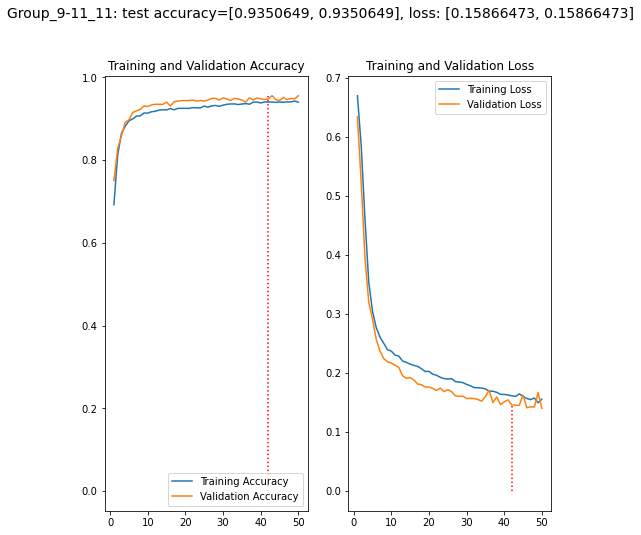

In [11]:
loss, acc = trainer.test()
print(f"performance loss: {loss} accuracy: {acc}")
trainer.plot_performance(name="task4_model_simple.png",group_no="Group_9-11_11")


***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

The parameters are optimized through backpropagation by checking if the classification of the training data matches its corresponding label. 
Because the network starts to overfit to the training data at a certain point when it can no longer improve otherwise.
We have a validation dataset to test on data that explicitly is not used for training to test performance on production-like data without exposing the network beforehand to the data to have an independent measure of success.

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [12]:
model_regularized = my_model.MaskClassifier("model_regularized", 64, 0.5, batch_norm=False)
summary(model_regularized, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           --                        --
├─Sequential: 1-1                        [32, 32, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 32, 62, 62]          896
│    └─ReLU: 2-2                         [32, 32, 62, 62]          --
│    └─Identity: 2-3                     [32, 32, 62, 62]          --
│    └─MaxPool2d: 2-4                    [32, 32, 31, 31]          --
│    └─Dropout: 2-5                      [32, 32, 31, 31]          --
│    └─Conv2d: 2-6                       [32, 32, 29, 29]          9,248
│    └─ReLU: 2-7                         [32, 32, 29, 29]          --
│    └─Identity: 2-8                     [32, 32, 29, 29]          --
│    └─MaxPool2d: 2-9                    [32, 32, 14, 14]          --
│    └─Dropout: 2-10                     [32, 32, 14, 14]          --
├─Sequential: 1-2                        [32, 1]                   --
│    └─Line

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

By randomly zeroing connections with the dropout, we prevent the co-adaption of neurons and therefore mitigate overfitting.
Therefore, we should be able to improve the network through more epochs resulting in later overfitting and therefore a higher overall accuracy.

Each connection has the probability of (in our case) p=0.5 of recieving 0 instead of the actual value.

Batch normalization also prevents overfitting and therefore allows us to increase the learning rate resulting in a better model in fewer epochs.

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [13]:
trainer2 = my_trainer.Trainer(model_regularized, datamodule,gpu=gpu_active)
trainer2.fit(epochs=50,lr=0.0001)
#trainer2.load_model()

Epoch 0: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 0 Training: Loss: 0.6821528673171997 Accuracy: 0.5665636658668518
Epoch 0 Validation: Loss: 0.6723897457122803 Accuracy: 0.6460937857627869


Epoch 1: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 1 Training: Loss: 0.64164799451828 Accuracy: 0.7042410969734192
Epoch 1 Validation: Loss: 0.6278760433197021 Accuracy: 0.8728298544883728


Epoch 2: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 2 Training: Loss: 0.5477229952812195 Accuracy: 0.8337625861167908
Epoch 2 Validation: Loss: 0.501699686050415 Accuracy: 0.8766493201255798


Epoch 3: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 3 Training: Loss: 0.4010413587093353 Accuracy: 0.8770318031311035
Epoch 3 Validation: Loss: 0.3620498478412628 Accuracy: 0.8872396349906921


Epoch 4: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 4 Training: Loss: 0.3203282952308655 Accuracy: 0.8925995826721191
Epoch 4 Validation: Loss: 0.31130826473236084 Accuracy: 0.8948784470558167


Epoch 5: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 5 Training: Loss: 0.28932324051856995 Accuracy: 0.898666501045227
Epoch 5 Validation: Loss: 0.271663099527359 Accuracy: 0.9111979007720947


Epoch 6: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 6 Training: Loss: 0.2705550193786621 Accuracy: 0.9047046899795532
Epoch 6 Validation: Loss: 0.2533346712589264 Accuracy: 0.9228298664093018


Epoch 7: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 7 Training: Loss: 0.2608875632286072 Accuracy: 0.9029303789138794
Epoch 7 Validation: Loss: 0.23806285858154297 Accuracy: 0.9243054986000061


Epoch 8: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 8 Training: Loss: 0.24793806672096252 Accuracy: 0.9105712175369263
Epoch 8 Validation: Loss: 0.22842955589294434 Accuracy: 0.9282986521720886


Epoch 9: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 9 Training: Loss: 0.24434155225753784 Accuracy: 0.9111149311065674
Epoch 9 Validation: Loss: 0.22032296657562256 Accuracy: 0.9256076216697693


Epoch 10: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 10 Training: Loss: 0.24365732073783875 Accuracy: 0.9143487215042114
Epoch 10 Validation: Loss: 0.21538563072681427 Accuracy: 0.9322049021720886


Epoch 11: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 11 Training: Loss: 0.2334168553352356 Accuracy: 0.9149209856987
Epoch 11 Validation: Loss: 0.21189849078655243 Accuracy: 0.9348090291023254


Epoch 12: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 12 Training: Loss: 0.2295721173286438 Accuracy: 0.9178971648216248
Epoch 12 Validation: Loss: 0.2064359337091446 Accuracy: 0.933506965637207


Epoch 13: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 13 Training: Loss: 0.228106290102005 Accuracy: 0.9218177795410156
Epoch 13 Validation: Loss: 0.20715616643428802 Accuracy: 0.933506965637207


Epoch 14: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 14 Training: Loss: 0.2227303683757782 Accuracy: 0.918641209602356
Epoch 14 Validation: Loss: 0.1991763710975647 Accuracy: 0.9400174021720886


Epoch 15: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 15 Training: Loss: 0.2179175168275833 Accuracy: 0.9192708134651184
Epoch 15 Validation: Loss: 0.19619958102703094 Accuracy: 0.941319465637207


Epoch 16: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 16 Training: Loss: 0.21638275682926178 Accuracy: 0.9168956279754639
Epoch 16 Validation: Loss: 0.19356511533260345 Accuracy: 0.941319465637207


Epoch 17: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 17 Training: Loss: 0.21644297242164612 Accuracy: 0.9247653484344482
Epoch 17 Validation: Loss: 0.19170551002025604 Accuracy: 0.9398437142372131


Epoch 18: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch 18 Training: Loss: 0.21398791670799255 Accuracy: 0.9203296899795532
Epoch 18 Validation: Loss: 0.18900401890277863 Accuracy: 0.9426215291023254


Epoch 19: 100%|██████████| 42/42 [00:15<00:00,  2.76it/s]


Epoch 19 Training: Loss: 0.21264059841632843 Accuracy: 0.9250515699386597
Epoch 19 Validation: Loss: 0.19173575937747955 Accuracy: 0.941319465637207


Epoch 20: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 20 Training: Loss: 0.21456371247768402 Accuracy: 0.9222756624221802
Epoch 20 Validation: Loss: 0.18787403404712677 Accuracy: 0.9426215291023254


Epoch 21: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 21 Training: Loss: 0.20670874416828156 Accuracy: 0.923677921295166
Epoch 21 Validation: Loss: 0.18435056507587433 Accuracy: 0.9439236521720886


Epoch 22: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 22 Training: Loss: 0.21169953048229218 Accuracy: 0.921159565448761
Epoch 22 Validation: Loss: 0.18434970080852509 Accuracy: 0.9426215291023254


Epoch 23: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 23 Training: Loss: 0.20798557996749878 Accuracy: 0.9247939586639404
Epoch 23 Validation: Loss: 0.1838546246290207 Accuracy: 0.9439236521720886


Epoch 24: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 24 Training: Loss: 0.20397941768169403 Accuracy: 0.927398145198822
Epoch 24 Validation: Loss: 0.18127693235874176 Accuracy: 0.9439236521720886


Epoch 25: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 25 Training: Loss: 0.20363585650920868 Accuracy: 0.9220753908157349
Epoch 25 Validation: Loss: 0.1822604089975357 Accuracy: 0.941319465637207


Epoch 26: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 26 Training: Loss: 0.20324337482452393 Accuracy: 0.9260244965553284
Epoch 26 Validation: Loss: 0.18159498274326324 Accuracy: 0.941319465637207


Epoch 27: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 27 Training: Loss: 0.20047083497047424 Accuracy: 0.9247939586639404
Epoch 27 Validation: Loss: 0.17786771059036255 Accuracy: 0.9451388716697693


Epoch 28: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 28 Training: Loss: 0.2051730901002884 Accuracy: 0.9235634803771973
Epoch 28 Validation: Loss: 0.17885906994342804 Accuracy: 0.9411458373069763


Epoch 29: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 29 Training: Loss: 0.19937878847122192 Accuracy: 0.9274839758872986
Epoch 29 Validation: Loss: 0.1775287538766861 Accuracy: 0.9465277791023254


Epoch 30: 100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


Epoch 30 Training: Loss: 0.19311250746250153 Accuracy: 0.9305459856987
Epoch 30 Validation: Loss: 0.17540793120861053 Accuracy: 0.9425346851348877


Epoch 31: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 31 Training: Loss: 0.19758650660514832 Accuracy: 0.926825761795044
Epoch 31 Validation: Loss: 0.17623545229434967 Accuracy: 0.9424479007720947


Epoch 32: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 32 Training: Loss: 0.19842974841594696 Accuracy: 0.923677921295166
Epoch 32 Validation: Loss: 0.17701713740825653 Accuracy: 0.9400174021720886


Epoch 33: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 33 Training: Loss: 0.19716660678386688 Accuracy: 0.9257096648216248
Epoch 33 Validation: Loss: 0.18148626387119293 Accuracy: 0.933506965637207


Epoch 34: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 34 Training: Loss: 0.19313982129096985 Accuracy: 0.9288004040718079
Epoch 34 Validation: Loss: 0.1729399710893631 Accuracy: 0.9438367486000061


Epoch 35: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 35 Training: Loss: 0.19441182911396027 Accuracy: 0.9278559684753418
Epoch 35 Validation: Loss: 0.1713610291481018 Accuracy: 0.9438367486000061


Epoch 36: 100%|██████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 36 Training: Loss: 0.18885323405265808 Accuracy: 0.9308322072029114
Epoch 36 Validation: Loss: 0.17160950601100922 Accuracy: 0.945225715637207


Epoch 37: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 37 Training: Loss: 0.18857939541339874 Accuracy: 0.9298305511474609
Epoch 37 Validation: Loss: 0.17029333114624023 Accuracy: 0.9464409351348877


Epoch 38: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 38 Training: Loss: 0.18738515675067902 Accuracy: 0.9294298887252808
Epoch 38 Validation: Loss: 0.17171455919742584 Accuracy: 0.9439236521720886


Epoch 39: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 39 Training: Loss: 0.1916780173778534 Accuracy: 0.9302026033401489
Epoch 39 Validation: Loss: 0.16959737241268158 Accuracy: 0.9437499642372131


Epoch 40: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 40 Training: Loss: 0.1866312325000763 Accuracy: 0.9301739931106567
Epoch 40 Validation: Loss: 0.17018012702465057 Accuracy: 0.9437499642372131


Epoch 41: 100%|██████████| 42/42 [00:12<00:00,  3.25it/s]


Epoch 41 Training: Loss: 0.18585669994354248 Accuracy: 0.9325778484344482
Epoch 41 Validation: Loss: 0.16869033873081207 Accuracy: 0.9411458373069763


Epoch 42: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 42 Training: Loss: 0.18566034734249115 Accuracy: 0.9336939454078674
Epoch 42 Validation: Loss: 0.169935405254364 Accuracy: 0.949131965637207


Epoch 43: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 43 Training: Loss: 0.1854291409254074 Accuracy: 0.9315476417541504
Epoch 43 Validation: Loss: 0.16744786500930786 Accuracy: 0.9437499642372131


Epoch 44: 100%|██████████| 42/42 [00:13<00:00,  3.04it/s]


Epoch 44 Training: Loss: 0.18496984243392944 Accuracy: 0.9323202967643738
Epoch 44 Validation: Loss: 0.1665978878736496 Accuracy: 0.9424479007720947


Epoch 45: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 45 Training: Loss: 0.18464252352714539 Accuracy: 0.9379006624221802
Epoch 45 Validation: Loss: 0.16688252985477448 Accuracy: 0.9477429986000061


Epoch 46: 100%|██████████| 42/42 [00:13<00:00,  3.15it/s]


Epoch 46 Training: Loss: 0.1869499385356903 Accuracy: 0.9274839758872986
Epoch 46 Validation: Loss: 0.16672378778457642 Accuracy: 0.9464409351348877


Epoch 47: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 47 Training: Loss: 0.18108591437339783 Accuracy: 0.935926079750061
Epoch 47 Validation: Loss: 0.1662531942129135 Accuracy: 0.9437499642372131


Epoch 48: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 48 Training: Loss: 0.17958617210388184 Accuracy: 0.9321486353874207
Epoch 48 Validation: Loss: 0.16383905708789825 Accuracy: 0.9424479007720947


Epoch 49: 100%|██████████| 42/42 [00:12<00:00,  3.26it/s]


Epoch 49 Training: Loss: 0.1820591241121292 Accuracy: 0.9315762519836426
Epoch 49 Validation: Loss: 0.16761551797389984 Accuracy: 0.9465277791023254


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

performance loss: 0.18036134541034698 accuracy: 0.9376623630523682


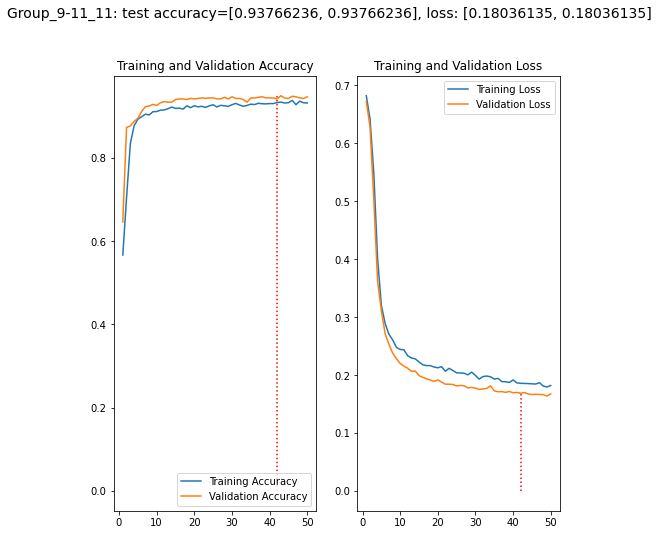

In [14]:
loss2, acc2 = trainer2.test()
print(f"performance loss: {loss2} accuracy: {acc2}")
trainer2.plot_performance(name="task4_model_regularized.png",group_no="Group_9-11_11")

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


Currently, the only real improvement seems to be that with regularization it takes less epochs to achieve high accuracy. Accuracy is comparable to without regularization but the performance loss is higher. It looks like it prevented overfitting from the accuracy graph since at the peak it stopped steadily improving and started fluctuating seemingly randomly.

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

In [18]:
datamodule_aug = my_datamodule.DataModule(img_size=64, batch_size=64,augmented=True,preload=False,num_workers=1)

Adding augm.
Adding augm.
Adding augm.


#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



Total convolutional layers: 2
(2,)


[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


Total convolutional layers: 2
(2,)


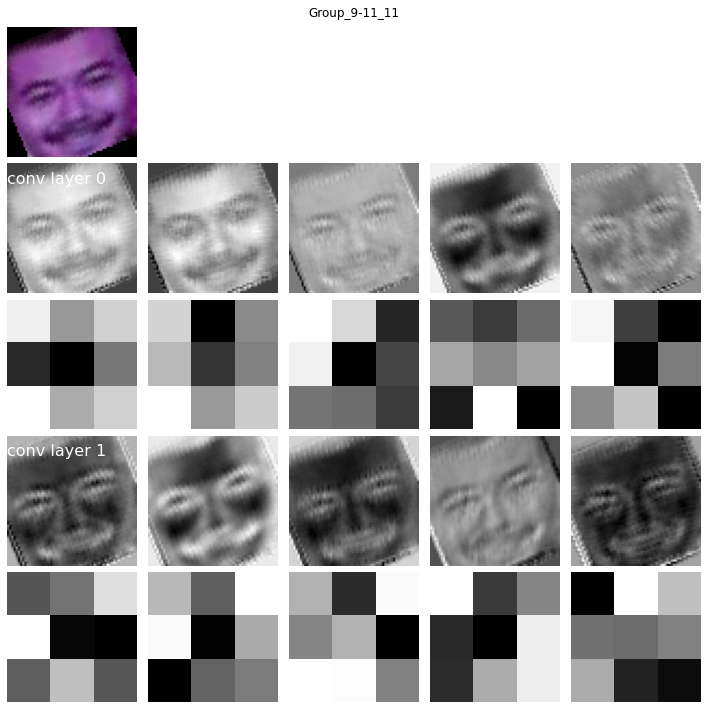

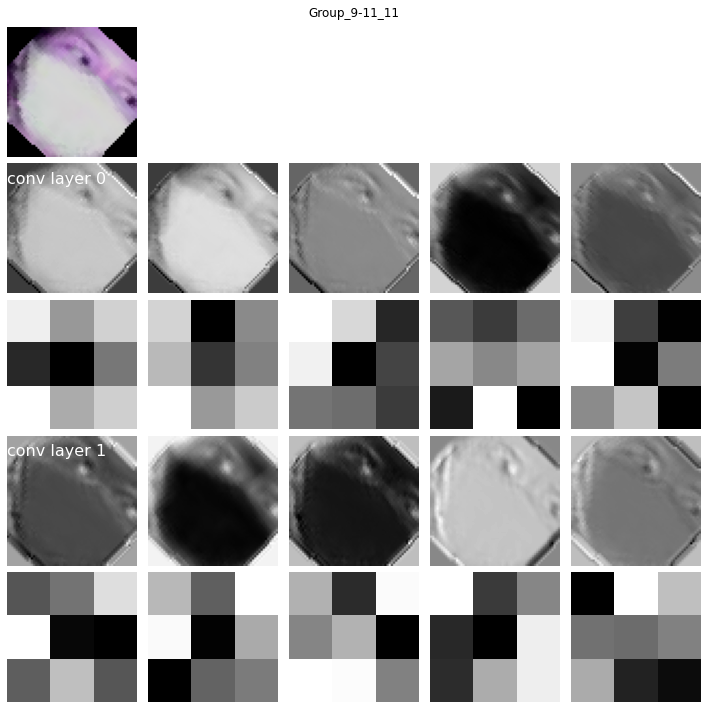

In [58]:
model_augmented = my_model.MaskClassifier("model_augmented", 64, 0.6, batch_norm=True)
#summary(model_augmented, (32, 3, 64, 64))
faceSample = datamodule_aug.train_dataset[0][0]
maskSample = datamodule_aug.train_dataset[len(datamodule_aug.train_dataset.face_paths) + 1][0]
utils.plot_activation_maps(model_augmented,faceSample, group_no="Group_9-11_11", name="task4_face_activation_maps_before")
utils.plot_activation_maps(model_augmented,maskSample, group_no="Group_9-11_11", name="task4_mask_activation_maps_before")

#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

In [59]:
trainer3 = my_trainer.Trainer(model_augmented, datamodule,gpu=gpu_active)
trainer3.fit(epochs=100,lr=0.0007)


Epoch 0: 100%|██████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 0 Training: Loss: 0.3951066732406616 Accuracy: 0.8498167991638184
Epoch 0 Validation: Loss: 0.3409616947174072 Accuracy: 0.8486111164093018


Epoch 1: 100%|██████████| 42/42 [00:13<00:00,  3.15it/s]


Epoch 1 Training: Loss: 0.22829368710517883 Accuracy: 0.9105426073074341
Epoch 1 Validation: Loss: 0.1710807830095291 Accuracy: 0.9411458373069763


Epoch 2: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 2 Training: Loss: 0.19093288481235504 Accuracy: 0.9304601550102234
Epoch 2 Validation: Loss: 0.16336797177791595 Accuracy: 0.9439236521720886


Epoch 3: 100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


Epoch 3 Training: Loss: 0.1811688244342804 Accuracy: 0.9360119104385376
Epoch 3 Validation: Loss: 0.19384294748306274 Accuracy: 0.9266493320465088


Epoch 4: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 4 Training: Loss: 0.17148208618164062 Accuracy: 0.9374141693115234
Epoch 4 Validation: Loss: 0.1661999374628067 Accuracy: 0.9397569298744202


Epoch 5: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 5 Training: Loss: 0.16616778075695038 Accuracy: 0.9440247416496277
Epoch 5 Validation: Loss: 0.16015425324440002 Accuracy: 0.9408853650093079


Epoch 6: 100%|██████████| 42/42 [00:13<00:00,  3.15it/s]


Epoch 6 Training: Loss: 0.13855159282684326 Accuracy: 0.9500629901885986
Epoch 6 Validation: Loss: 0.15054671466350555 Accuracy: 0.9461805820465088


Epoch 7: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 7 Training: Loss: 0.13878941535949707 Accuracy: 0.9462569355964661
Epoch 7 Validation: Loss: 0.16220815479755402 Accuracy: 0.9372395873069763


Epoch 8: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 8 Training: Loss: 0.1318889707326889 Accuracy: 0.9584477543830872
Epoch 8 Validation: Loss: 0.1436305046081543 Accuracy: 0.9501736164093018


Epoch 9: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 9 Training: Loss: 0.12424776703119278 Accuracy: 0.9506638646125793
Epoch 9 Validation: Loss: 0.17119504511356354 Accuracy: 0.9385416507720947


Epoch 10: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 10 Training: Loss: 0.12605512142181396 Accuracy: 0.9512076377868652
Epoch 10 Validation: Loss: 0.13945136964321136 Accuracy: 0.9516492486000061


Epoch 11: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 11 Training: Loss: 0.1196916475892067 Accuracy: 0.9553571343421936
Epoch 11 Validation: Loss: 0.16355495154857635 Accuracy: 0.9408853650093079


Epoch 12: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 12 Training: Loss: 0.12972939014434814 Accuracy: 0.9534398317337036
Epoch 12 Validation: Loss: 0.1407039612531662 Accuracy: 0.9486978650093079


Epoch 13: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 13 Training: Loss: 0.12047368288040161 Accuracy: 0.9559295177459717
Epoch 13 Validation: Loss: 0.13563869893550873 Accuracy: 0.9464409351348877


Epoch 14: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 14 Training: Loss: 0.10836124420166016 Accuracy: 0.9603937864303589
Epoch 14 Validation: Loss: 0.12630276381969452 Accuracy: 0.9515624642372131


Epoch 15: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 15 Training: Loss: 0.09169932454824448 Accuracy: 0.9688644409179688
Epoch 15 Validation: Loss: 0.13790535926818848 Accuracy: 0.9527778029441833


Epoch 16: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 16 Training: Loss: 0.10911891609430313 Accuracy: 0.9629979729652405
Epoch 16 Validation: Loss: 0.13165095448493958 Accuracy: 0.9527778029441833


Epoch 17: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 17 Training: Loss: 0.09579528123140335 Accuracy: 0.959850013256073
Epoch 17 Validation: Loss: 0.1765071153640747 Accuracy: 0.9342882037162781


Epoch 18: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 18 Training: Loss: 0.09293311834335327 Accuracy: 0.9614239931106567
Epoch 18 Validation: Loss: 0.12526120245456696 Accuracy: 0.9539930820465088


Epoch 19: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 19 Training: Loss: 0.10081852972507477 Accuracy: 0.9622539281845093
Epoch 19 Validation: Loss: 0.12483295053243637 Accuracy: 0.9476562142372131


Epoch 20: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 20 Training: Loss: 0.0811152309179306 Accuracy: 0.9689503908157349
Epoch 20 Validation: Loss: 0.1431654840707779 Accuracy: 0.9432291984558105


Epoch 21: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 21 Training: Loss: 0.07586024701595306 Accuracy: 0.9720124006271362
Epoch 21 Validation: Loss: 0.14075030386447906 Accuracy: 0.9486978650093079


Epoch 22: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 22 Training: Loss: 0.08833148330450058 Accuracy: 0.9645718932151794
Epoch 22 Validation: Loss: 0.13734827935695648 Accuracy: 0.9408853650093079


Epoch 23: 100%|██████████| 42/42 [00:12<00:00,  3.23it/s]


Epoch 23 Training: Loss: 0.07258764654397964 Accuracy: 0.9730426073074341
Epoch 23 Validation: Loss: 0.14326335489749908 Accuracy: 0.9435763955116272


Epoch 24: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 24 Training: Loss: 0.07904323190450668 Accuracy: 0.9720982313156128
Epoch 24 Validation: Loss: 0.1258087456226349 Accuracy: 0.9502604007720947


Epoch 25: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 25 Training: Loss: 0.06751317530870438 Accuracy: 0.9743303656578064
Epoch 25 Validation: Loss: 0.12394330650568008 Accuracy: 0.9514756798744202


Epoch 26: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 26 Training: Loss: 0.07987906783819199 Accuracy: 0.9689503908157349
Epoch 26 Validation: Loss: 0.13313867151737213 Accuracy: 0.9513888955116272


Epoch 27: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 27 Training: Loss: 0.07511855661869049 Accuracy: 0.9705243110656738
Epoch 27 Validation: Loss: 0.12538084387779236 Accuracy: 0.9579861164093018


Epoch 28: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 28 Training: Loss: 0.07781881839036942 Accuracy: 0.9720124006271362
Epoch 28 Validation: Loss: 0.13439428806304932 Accuracy: 0.9515624642372131


Epoch 29: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 29 Training: Loss: 0.05929405242204666 Accuracy: 0.9786229729652405
Epoch 29 Validation: Loss: 0.14340688288211823 Accuracy: 0.9526910185813904


Epoch 30: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 30 Training: Loss: 0.07665405422449112 Accuracy: 0.9689503908157349
Epoch 30 Validation: Loss: 0.1244538202881813 Accuracy: 0.9541666507720947


Epoch 31: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 31 Training: Loss: 0.06642583757638931 Accuracy: 0.976934552192688
Epoch 31 Validation: Loss: 0.15434026718139648 Accuracy: 0.9486110806465149


Epoch 32: 100%|██████████| 42/42 [00:14<00:00,  2.98it/s]


Epoch 32 Training: Loss: 0.06585514545440674 Accuracy: 0.9738724827766418
Epoch 32 Validation: Loss: 0.11583804339170456 Accuracy: 0.9605903029441833


Epoch 33: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 33 Training: Loss: 0.06941455602645874 Accuracy: 0.9778789281845093
Epoch 33 Validation: Loss: 0.10913095623254776 Accuracy: 0.9699652791023254


Epoch 34: 100%|██████████| 42/42 [00:13<00:00,  3.15it/s]


Epoch 34 Training: Loss: 0.0668143481016159 Accuracy: 0.972470223903656
Epoch 34 Validation: Loss: 0.14382050931453705 Accuracy: 0.9526910185813904


Epoch 35: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 35 Training: Loss: 0.06072138622403145 Accuracy: 0.9773065447807312
Epoch 35 Validation: Loss: 0.10684695839881897 Accuracy: 0.9646701216697693


Epoch 36: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 36 Training: Loss: 0.05815770477056503 Accuracy: 0.979080855846405
Epoch 36 Validation: Loss: 0.10311541706323624 Accuracy: 0.9671874642372131


Epoch 37: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 37 Training: Loss: 0.05630280449986458 Accuracy: 0.9783368110656738
Epoch 37 Validation: Loss: 0.22439712285995483 Accuracy: 0.9302083849906921


Epoch 38: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 38 Training: Loss: 0.05954348295927048 Accuracy: 0.9782509803771973
Epoch 38 Validation: Loss: 0.10235591977834702 Accuracy: 0.9619791507720947


Epoch 39: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 39 Training: Loss: 0.06426949054002762 Accuracy: 0.9789950251579285
Epoch 39 Validation: Loss: 0.12737511098384857 Accuracy: 0.9606770873069763


Epoch 40: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 40 Training: Loss: 0.06227724254131317 Accuracy: 0.9750744104385376
Epoch 40 Validation: Loss: 0.10564548522233963 Accuracy: 0.9658854007720947


Epoch 41: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 41 Training: Loss: 0.04995502158999443 Accuracy: 0.982429027557373
Epoch 41 Validation: Loss: 0.11148130148649216 Accuracy: 0.9646701216697693


Epoch 42: 100%|██████████| 42/42 [00:15<00:00,  2.71it/s]


Epoch 42 Training: Loss: 0.05143238976597786 Accuracy: 0.9781650304794312
Epoch 42 Validation: Loss: 0.14870886504650116 Accuracy: 0.9435763955116272


Epoch 43: 100%|██████████| 42/42 [00:13<00:00,  3.05it/s]


Epoch 43 Training: Loss: 0.04441727697849274 Accuracy: 0.9801110625267029
Epoch 43 Validation: Loss: 0.12851637601852417 Accuracy: 0.9631944298744202


Epoch 44: 100%|██████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 44 Training: Loss: 0.05587673932313919 Accuracy: 0.9768487215042114
Epoch 44 Validation: Loss: 0.14462317526340485 Accuracy: 0.9539930820465088


Epoch 45: 100%|██████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 45 Training: Loss: 0.046719104051589966 Accuracy: 0.9789090752601624
Epoch 45 Validation: Loss: 0.13286389410495758 Accuracy: 0.9578993320465088


Epoch 46: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 46 Training: Loss: 0.047395892441272736 Accuracy: 0.9799107313156128
Epoch 46 Validation: Loss: 0.1548447459936142 Accuracy: 0.9421007037162781


Epoch 47: 100%|██████████| 42/42 [00:14<00:00,  2.92it/s]


Epoch 47 Training: Loss: 0.04001453518867493 Accuracy: 0.9842033386230469
Epoch 47 Validation: Loss: 0.11283650249242783 Accuracy: 0.9604166150093079


Epoch 48: 100%|██████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 48 Training: Loss: 0.055873382836580276 Accuracy: 0.9798249006271362
Epoch 48 Validation: Loss: 0.12955622375011444 Accuracy: 0.9631944298744202


Epoch 49: 100%|██████████| 42/42 [00:13<00:00,  3.09it/s]


Epoch 49 Training: Loss: 0.05486398562788963 Accuracy: 0.9782509803771973
Epoch 49 Validation: Loss: 0.12015882879495621 Accuracy: 0.9631944298744202


Epoch 50: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 50 Training: Loss: 0.05340805649757385 Accuracy: 0.9778789281845093
Epoch 50 Validation: Loss: 0.12760673463344574 Accuracy: 0.9605903029441833


Epoch 51: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 51 Training: Loss: 0.054286934435367584 Accuracy: 0.9799107313156128
Epoch 51 Validation: Loss: 0.13691148161888123 Accuracy: 0.9555554986000061


Epoch 52: 100%|██████████| 42/42 [00:14<00:00,  2.93it/s]


Epoch 52 Training: Loss: 0.05665510520339012 Accuracy: 0.978708803653717
Epoch 52 Validation: Loss: 0.13195769488811493 Accuracy: 0.9540798664093018


Epoch 53: 100%|██████████| 42/42 [00:13<00:00,  3.07it/s]


Epoch 53 Training: Loss: 0.06408017128705978 Accuracy: 0.9752747416496277
Epoch 53 Validation: Loss: 0.1488693356513977 Accuracy: 0.9526910185813904


Epoch 54: 100%|██████████| 42/42 [00:13<00:00,  3.08it/s]


Epoch 54 Training: Loss: 0.05208433419466019 Accuracy: 0.9803971648216248
Epoch 54 Validation: Loss: 0.1582358032464981 Accuracy: 0.9513888955116272


Epoch 55: 100%|██████████| 42/42 [00:14<00:00,  2.97it/s]


Epoch 55 Training: Loss: 0.03994063660502434 Accuracy: 0.9842033386230469
Epoch 55 Validation: Loss: 0.12463513016700745 Accuracy: 0.9578993320465088


Epoch 56: 100%|██████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 56 Training: Loss: 0.04250989481806755 Accuracy: 0.9873511791229248
Epoch 56 Validation: Loss: 0.13494689762592316 Accuracy: 0.9565972685813904


Epoch 57: 100%|██████████| 42/42 [00:13<00:00,  3.12it/s]


Epoch 57 Training: Loss: 0.03324135020375252 Accuracy: 0.9880093932151794
Epoch 57 Validation: Loss: 0.1351151019334793 Accuracy: 0.9605903029441833


Epoch 58: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 58 Training: Loss: 0.029410216957330704 Accuracy: 0.9909855723381042
Epoch 58 Validation: Loss: 0.12027028948068619 Accuracy: 0.9673611521720886


Epoch 59: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 59 Training: Loss: 0.03513659909367561 Accuracy: 0.9848614931106567
Epoch 59 Validation: Loss: 0.13203702867031097 Accuracy: 0.9619791507720947


Epoch 60: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 60 Training: Loss: 0.03759996220469475 Accuracy: 0.986521303653717
Epoch 60 Validation: Loss: 0.13258513808250427 Accuracy: 0.9565972685813904


Epoch 61: 100%|██████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 61 Training: Loss: 0.050022464245557785 Accuracy: 0.9842033386230469
Epoch 61 Validation: Loss: 0.11267312616109848 Accuracy: 0.968663215637207


Epoch 62: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 62 Training: Loss: 0.052572380751371384 Accuracy: 0.9819712042808533
Epoch 62 Validation: Loss: 0.1789616495370865 Accuracy: 0.9407985806465149


Epoch 63: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 63 Training: Loss: 0.0372372567653656 Accuracy: 0.9857772588729858
Epoch 63 Validation: Loss: 0.1250297576189041 Accuracy: 0.9645833373069763


Epoch 64: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 64 Training: Loss: 0.039128419011831284 Accuracy: 0.9863495826721191
Epoch 64 Validation: Loss: 0.13001716136932373 Accuracy: 0.9567708373069763


Epoch 65: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 65 Training: Loss: 0.03272828459739685 Accuracy: 0.9875515699386597
Epoch 65 Validation: Loss: 0.12238436192274094 Accuracy: 0.9620659351348877


Epoch 66: 100%|██████████| 42/42 [00:13<00:00,  3.12it/s]


Epoch 66 Training: Loss: 0.04276226460933685 Accuracy: 0.9868075251579285
Epoch 66 Validation: Loss: 0.12863601744174957 Accuracy: 0.9579861164093018


Epoch 67: 100%|██████████| 42/42 [00:13<00:00,  3.14it/s]


Epoch 67 Training: Loss: 0.03623555600643158 Accuracy: 0.9854052662849426
Epoch 67 Validation: Loss: 0.12091244012117386 Accuracy: 0.968663215637207


Epoch 68: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 68 Training: Loss: 0.04655776172876358 Accuracy: 0.9835451245307922
Epoch 68 Validation: Loss: 0.11881458014249802 Accuracy: 0.9738715291023254


Epoch 69: 100%|██████████| 42/42 [00:15<00:00,  2.73it/s]


Epoch 69 Training: Loss: 0.03839920461177826 Accuracy: 0.9854052662849426
Epoch 69 Validation: Loss: 0.11672144383192062 Accuracy: 0.9619791507720947


Epoch 70: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 70 Training: Loss: 0.05198553577065468 Accuracy: 0.9816849827766418
Epoch 70 Validation: Loss: 0.22455239295959473 Accuracy: 0.9447916150093079


Epoch 71: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 71 Training: Loss: 0.038402169942855835 Accuracy: 0.984002947807312
Epoch 71 Validation: Loss: 0.11696401238441467 Accuracy: 0.9633679986000061


Epoch 72: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 72 Training: Loss: 0.02487192302942276 Accuracy: 0.9910714030265808
Epoch 72 Validation: Loss: 0.11519861966371536 Accuracy: 0.960850715637207


Epoch 73: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 73 Training: Loss: 0.03285958245396614 Accuracy: 0.9869791865348816
Epoch 73 Validation: Loss: 0.12583880126476288 Accuracy: 0.9660590291023254


Epoch 74: 100%|██████████| 42/42 [00:13<00:00,  3.05it/s]


Epoch 74 Training: Loss: 0.04765462130308151 Accuracy: 0.9813988208770752
Epoch 74 Validation: Loss: 0.14114971458911896 Accuracy: 0.9658854007720947


Epoch 75: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 75 Training: Loss: 0.04016219452023506 Accuracy: 0.9857772588729858
Epoch 75 Validation: Loss: 0.13523578643798828 Accuracy: 0.9555554986000061


Epoch 76: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 76 Training: Loss: 0.060195762664079666 Accuracy: 0.9805689454078674
Epoch 76 Validation: Loss: 0.14677894115447998 Accuracy: 0.9555554986000061


Epoch 77: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 77 Training: Loss: 0.05253062769770622 Accuracy: 0.9825148582458496
Epoch 77 Validation: Loss: 0.13748708367347717 Accuracy: 0.9594617486000061


Epoch 78: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 78 Training: Loss: 0.05793337523937225 Accuracy: 0.9791666865348816
Epoch 78 Validation: Loss: 0.13780775666236877 Accuracy: 0.9581596851348877


Epoch 79: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 79 Training: Loss: 0.04804697632789612 Accuracy: 0.9823431968688965
Epoch 79 Validation: Loss: 0.18979929387569427 Accuracy: 0.9487847685813904


Epoch 80: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 80 Training: Loss: 0.04040195420384407 Accuracy: 0.9854910969734192
Epoch 80 Validation: Loss: 0.12785367667675018 Accuracy: 0.9646701216697693


Epoch 81: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 81 Training: Loss: 0.03634457290172577 Accuracy: 0.9866071343421936
Epoch 81 Validation: Loss: 0.1305769383907318 Accuracy: 0.9581596851348877


Epoch 82: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 82 Training: Loss: 0.042310431599617004 Accuracy: 0.9871795177459717
Epoch 82 Validation: Loss: 0.11356798559427261 Accuracy: 0.9674479365348816


Epoch 83: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 83 Training: Loss: 0.02668442577123642 Accuracy: 0.9888392686843872
Epoch 83 Validation: Loss: 0.1377088874578476 Accuracy: 0.9606770873069763


Epoch 84: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 84 Training: Loss: 0.025882255285978317 Accuracy: 0.9888392686843872
Epoch 84 Validation: Loss: 0.15230019390583038 Accuracy: 0.9578993320465088


Epoch 85: 100%|██████████| 42/42 [00:44<00:00,  1.07s/it]


Epoch 85 Training: Loss: 0.04168572276830673 Accuracy: 0.9845753908157349
Epoch 85 Validation: Loss: 0.11349228024482727 Accuracy: 0.9724826216697693


Epoch 86: 100%|██████████| 42/42 [00:16<00:00,  2.51it/s]


Epoch 86 Training: Loss: 0.036823395639657974 Accuracy: 0.9876374006271362
Epoch 86 Validation: Loss: 0.1668122261762619 Accuracy: 0.9593749642372131


Epoch 87: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 87 Training: Loss: 0.03627106547355652 Accuracy: 0.9873511791229248
Epoch 87 Validation: Loss: 0.14067043364048004 Accuracy: 0.9660590291023254


Epoch 88: 100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


Epoch 88 Training: Loss: 0.02959773875772953 Accuracy: 0.9899553656578064
Epoch 88 Validation: Loss: 0.13804231584072113 Accuracy: 0.9580729007720947


Epoch 89: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 89 Training: Loss: 0.029105013236403465 Accuracy: 0.9898695349693298
Epoch 89 Validation: Loss: 0.12552030384540558 Accuracy: 0.9633679986000061


Epoch 90: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 90 Training: Loss: 0.027028098702430725 Accuracy: 0.9899553656578064
Epoch 90 Validation: Loss: 0.1352531760931015 Accuracy: 0.9660590291023254


Epoch 91: 100%|██████████| 42/42 [00:13<00:00,  3.10it/s]


Epoch 91 Training: Loss: 0.03303662687540054 Accuracy: 0.9867215752601624
Epoch 91 Validation: Loss: 0.16860604286193848 Accuracy: 0.9661458134651184


Epoch 92: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 92 Training: Loss: 0.038586683571338654 Accuracy: 0.986521303653717
Epoch 92 Validation: Loss: 0.11470339447259903 Accuracy: 0.968663215637207


Epoch 93: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 93 Training: Loss: 0.02863401733338833 Accuracy: 0.9899553656578064
Epoch 93 Validation: Loss: 0.12499422580003738 Accuracy: 0.960850715637207


Epoch 94: 100%|██████████| 42/42 [00:13<00:00,  3.16it/s]


Epoch 94 Training: Loss: 0.026681028306484222 Accuracy: 0.9895833134651184
Epoch 94 Validation: Loss: 0.1295473277568817 Accuracy: 0.9633679986000061


Epoch 95: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 95 Training: Loss: 0.037307724356651306 Accuracy: 0.9879235625267029
Epoch 95 Validation: Loss: 0.14097799360752106 Accuracy: 0.9661458134651184


Epoch 96: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 96 Training: Loss: 0.031268782913684845 Accuracy: 0.9891254901885986
Epoch 96 Validation: Loss: 0.133970245718956 Accuracy: 0.9620659351348877


Epoch 97: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 97 Training: Loss: 0.028234437108039856 Accuracy: 0.9882956147193909
Epoch 97 Validation: Loss: 0.1307188719511032 Accuracy: 0.9594617486000061


Epoch 98: 100%|██████████| 42/42 [00:13<00:00,  3.19it/s]


Epoch 98 Training: Loss: 0.02296680584549904 Accuracy: 0.9899553656578064
Epoch 98 Validation: Loss: 0.13297633826732635 Accuracy: 0.9580729007720947


Epoch 99: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 99 Training: Loss: 0.03512520343065262 Accuracy: 0.9849473834037781
Epoch 99 Validation: Loss: 0.15243631601333618 Accuracy: 0.9541666507720947


#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.

***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

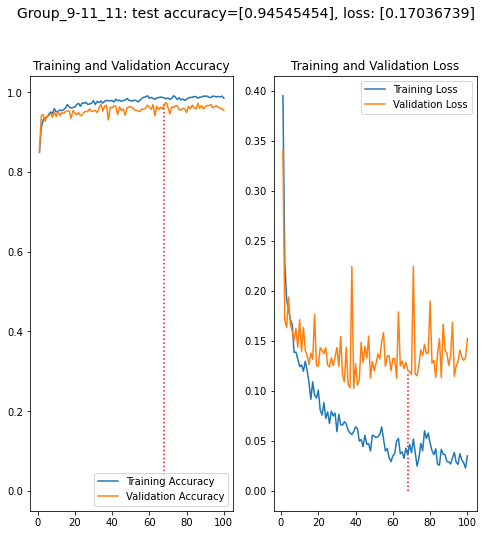

In [60]:
trainer3.plot_performance(group_no="Group_9-11_11", name="task4_model_augmented")

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

The augmented model is the first model that has less accuracy and more loss in the validation data than in the training data while still having overall higher accuracy. 

By increasing the variability of our data through random augmentation the loss does not convert to a fixed number as the other models. Instead the performance greatly differse from epoche to epoche instead of steadily imroving. Which results in an unstable model. 

Also because the validation loss is way higher than the training loss we assume that this process made the overfitting worse than before. 

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

Total convolutional layers: 2
(2,)
Total convolutional layers: 2
(2,)


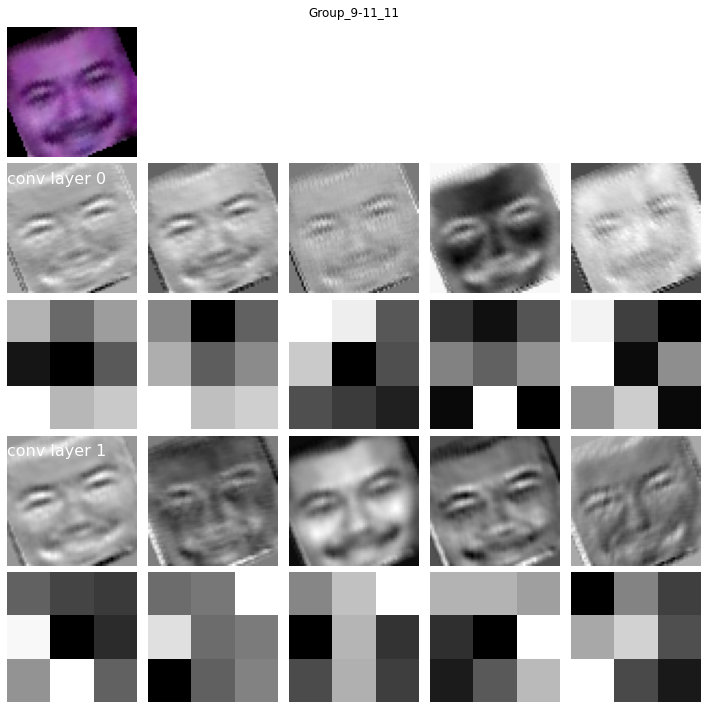

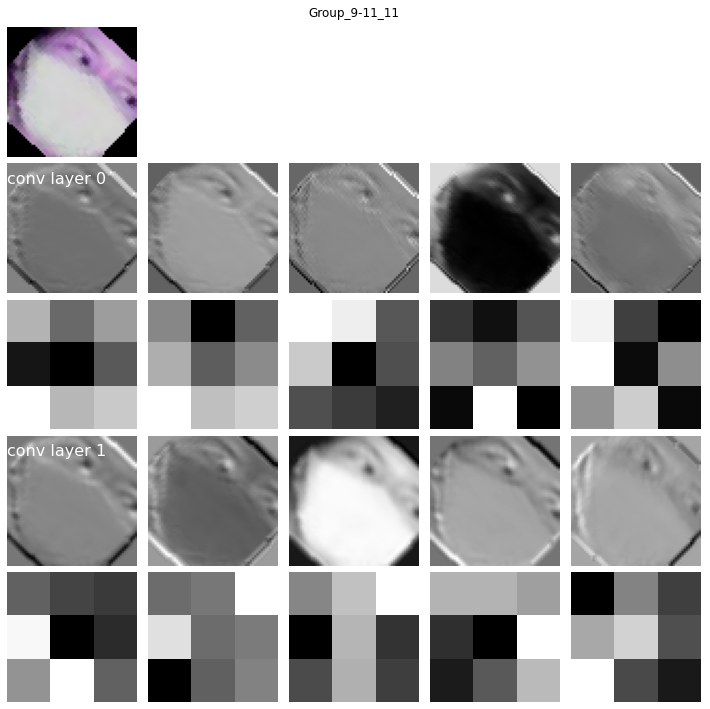

In [61]:
utils.plot_activation_maps(model_augmented, faceSample, group_no="Group_9-11_11", name="task4_face_activation_maps_after")
utils.plot_activation_maps(model_augmented, maskSample, group_no="Group_9-11_11", name="task4_mask_activation_maps_after")

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


The activations and kernels moved from seemingly random to specialising on either strengthening major facial features (like eyes, mouth or nose) or amplifying mask visibility and importance.
Although, most kernels do not differ too much from their random initialisation they moved to either identifying facial features or masks better than before training.
This makes much sense since backpropagation should reinforce behaviour leading to better identification of masks or mouths and noses.

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

In [65]:
from sklearn.metrics import confusion_matrix

X, y = next(iter(datamodule_aug.test_dataloader()))
y_pred = trainer3.predict(X)

tn, fp, fn, tp = confusion_matrix(y.detach().numpy(), y_pred).ravel()

(tn, fp, fn, tp)

(181, 12, 108, 84)

***
#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness. 


The main difference between TASK3 and 4 is that instead of using handcrafted features like in TASK3 we are using CNN techniques that automatically extract features in the first inner layers.
This has the advantage that our model gets more robust as the networks learns multiple features (low level, mid and high level). The last layers use these layers to perform the actual classification task. 

Another difference is that CNN allows us to model more complex decision boundaries. In Task3 we used the K nearest neighbours approach to classify our data. In Task4 the CNN models more complex decision boundaries dependending on the type of network we use, which layers and so. 
But this also brings risks as the chance of overfitting to the training data is higher.

The disadvantages of CNN in comparision to TASK3 is that we need way more data for the model to get good results. 

In the end when we look at the score we see that the approach with CNN provides way better accuracy than the simple KNN approach in TASK3. 